In [131]:
import pandas as pd
import numpy as np
from sklearn.tree import ExtraTreeRegressor
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler


In [132]:
df = pd.read_csv("heart_attack\heart.csv")
saturate =  pd.read_csv("heart_attack\o2Saturation.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [133]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [134]:
df['max_attack'] = 220


In [135]:
df['precis_of_beats'] = (df['age']+df['thalachh'])/df['max_attack']

In [136]:
df['chol_in_gram'] = df['chol']/100

In [137]:
df1 = df.drop(['age', 'thalachh','chol', 'trtbps', 'max_attack'], axis=1)

In [138]:
df1.head()

,sex,cp,fbs,restecg,exng,oldpeak,slp,caa,thall,output,precis_of_beats,chol_in_gram
0,1,3,1,0,0,2.3,0,0,1,1,0.968182,2.33
1,1,2,0,1,0,3.5,0,0,2,1,1.018182,2.50
2,0,1,0,0,0,1.4,2,0,2,1,0.968182,2.04
3,1,1,0,1,0,0.8,2,0,2,1,1.063636,2.36
4,0,0,0,1,1,0.6,2,0,2,1,1.000000,3.54


<AxesSubplot:>

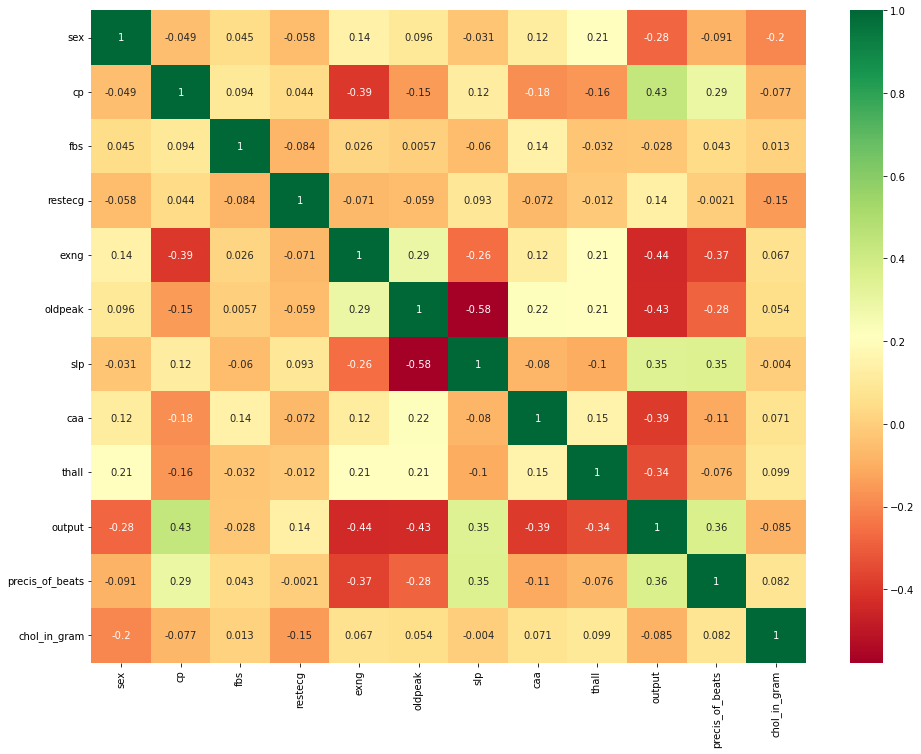

In [139]:
corrmat = df1.corr()
top_corr_fea = corrmat.index
plt.figure(figsize=(16,12))
sns.heatmap(df1[top_corr_fea].corr(), annot=True, cmap='RdYlGn')

In [140]:
y = df1['output']
x = df1.drop(['output'], axis=1)

In [141]:
extra_tree = ExtraTreeRegressor()
extra_tree.fit(x,y)

ExtraTreeRegressor()

In [142]:
extra_tree.feature_importances_

array([0.01263191, 0.1360964 , 0.02751694, 0.04938883, 0.07680928,
       0.12553029, 0.05635669, 0.23780793, 0.12844108, 0.10150451,
       0.04791614])

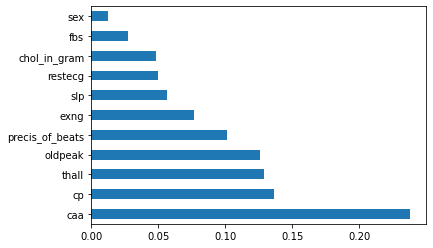

In [143]:
feat_importan = pd.Series(extra_tree.feature_importances_, index= x.columns)
feat_importan.nlargest(12).plot(kind = 'barh')
plt.show()

In [144]:
X = x.drop(['fbs'], axis=1)

In [145]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [146]:
x_train.shape

(242, 10)

In [147]:
knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto')
knn.fit(x_train,y_train)
predictions = knn.predict(x_test)
scores = (predictions == y_test).sum()/len(y_test)
scores

0.5409836065573771

In [148]:

from sklearn.svm import SVC
# svc = SVC()
# svc.fit(x_train,y_train)
# predictions1 = svc.predict(x_test)
# scores1 = (predictions1 == y_test).sum()/len(y_test)
# scores1


In [149]:

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [150]:
pre = clf.predict(x_test)
(pre == y_test).sum()/len(y_test)


0.8852459016393442

In [151]:
from sklearn.metrics import plot_confusion_matrix, classification_report

print(classification_report(y_test, predictions1))
print(plot_confusion_matrix(svc, x_test,y_test))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.89      0.94      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



ValueError: X.shape[1] = 10 should be equal to 11, the number of features at training time

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
scor = (pred == y_test).sum()/len(y_test)
scor


0.8688524590163934

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
sv = SVC()
parameteres = [{'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],  
'C':[1,2,3,5,7],'gamma':['auto','scale'], 
 'max_iter':[-1,2,1,3]}]
grd = GridSearchCV(estimator=sv, param_grid= parameteres)

# rnd = RandomizedSearchCV(model, param_distributions=parameteres, n_iter=10)

In [ ]:
grd_train = grd.fit(x_train,y_train)

C:\Users\asus\anaconda3\envs\school\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\asus\anaconda3\envs\school\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\asus\anaconda3\envs\school\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\asus\anaconda3\envs\school\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or Min

In [ ]:
grd.best_params_

{'C': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1}

In [ ]:
svc = SVC(C=3, gamma='auto', kernel='rbf',max_iter=-1)
svc.fit(x_train,y_train)
predictions1 = svc.predict(x_test)
scores1 = (predictions1 == y_test).sum()/len(y_test)
scores1

0.9016393442622951